<h1> Regression Learning <h1>

<h2> Linear vs Logistic Regression </h2>

<h4> Linear Regression </h4>
Linear Regression is a statistical method that is used to show the relationship between two variables.

It is a straight line through data points that best describe how the predictor affects the outcome. 

The formula is y=β0+β1x+ε

Where:

y is the dependent variable (what you're trying to predict)

x is the independent variable (what you're using to predict)

β0 is the intercept (where the line crosses the y-axis)

β1 is the slope (how much y changes for each unit change in x)

ε is the error term (random noise)


<h4> Logistic Regression </h4>
Logistic regression is a statistical method that is used when your outcome (dependent variable) is categorical.  

Instead of predicting a number like in linear regression, logistic regression predicts the probability that something belongs to a certain category.  

The formula is P(y=1|x) = 1 / 1 + e^-(B0 +B1x)

This function squishes the output between 0 and 1 so you get a probability.  If P > .5 then predict 1 and if P≤0.5, predict 0 (default threshold, but can be adjusted)


<h4> Main Takeaway </h4>
Use linear regression for predicting continuous values
Use logistic regression for predicting cateogries (usually binary)

<h3> Linear Regression Example </h3>

Price = 23.258248 + 0.176967 * Sqft


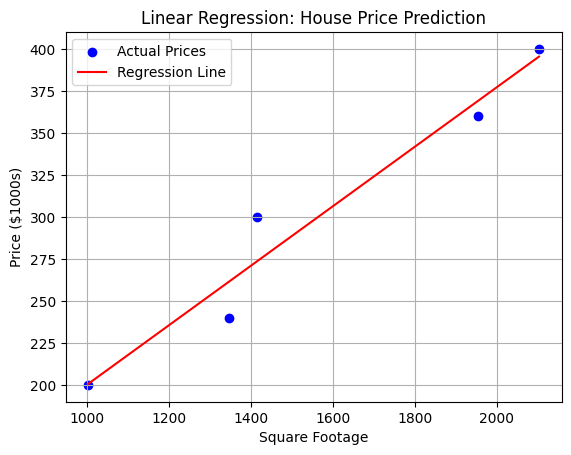

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Data For Linear Regression To Predict House Price Using SqFt

sqft = np.array([1002, 1345, 1415, 1954, 2103]).reshape(-1,1)
price = np.array([200, 240, 300, 360, 400])

#Create and train the model
model = LinearRegression()
model.fit(sqft, price)

#Predict Prices
prediction = model.predict(sqft)

#Print the Equation
intercept = model.intercept_
slope = model.coef_[0]
print(f"Price = {intercept:2f} + {slope:3f} * Sqft")

# Plotting on a scatter plot
plt.scatter(sqft, price, color='blue', label='Actual Prices')
plt.plot(sqft, prediction, color='red', label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price ($1000s)')
plt.title('Linear Regression: House Price Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#Predict based on New Home with 1600 sqft

new_sqft = np.array([[1600]]) 
predicted_price = model.predict(new_sqft)[0]

print(f"Predicted price for a 1600 sq ft house: ${predicted_price:.2f}")

Predicted price for a 1600 sq ft house: $306.41


In [5]:
#Predict based on New Home with 600 sqft

new_sqft = np.array([[600]]) 
predicted_price = model.predict(new_sqft)[0]

print(f"Predicted price for a 600 sq ft house: ${predicted_price:.2f}")

Predicted price for a 600 sq ft house: $129.44


<h3> Logistic Regression Example </h3>

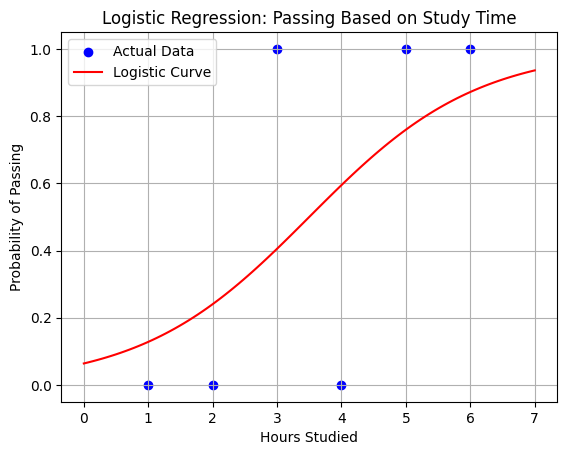

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data to predict if a student will pass or fail an exam based on hours studied where 1 = Passed and 0 = Failed
hours = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
passed = np.array([0, 0, 1, 0, 1, 1])

# Create and train the model
model = LogisticRegression()
model.fit(hours, passed)

# Predict probabilities
x_vals = np.linspace(0, 7, 100).reshape(-1, 1)
probabilities = model.predict_proba(x_vals)[:, 1] 

# Plot on scatter plot
plt.scatter(hours, passed, color='blue', label='Actual Data')
plt.plot(x_vals, probabilities, color='red', label='Logistic Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Passing Based on Study Time')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#Predict with new student data 
new_student = np.array([[5.5]])
pred_prob = model.predict_proba(new_student)[0, 1]
print(f"Probability of passing with 5.5 hours of studying: {pred_prob:.2f}")



Probability of passing with 5.5 hours of studying: 0.82


In [8]:
#Predict with new student data
new_student = np.array([[2.5]])
pred_prob = model.predict_proba(new_student)[0, 1]
print(f"Probability of passing with 5.5 hours of studying: {pred_prob:.2f}")

Probability of passing with 5.5 hours of studying: 0.32


<h3> Improving Linear Regression Models </h3>

Least Sqaure Estimation of Parameters

Least squares estimates the parameters by minimizing the sum of the squares of the difference between the observations and the regression line. 

This works by calculating how fare the predictions of the line are from the actual y values in the dataset. You then square the error to avoid positives and negatives and to punish big errors more.  You then need to sum all the squared errors and then find the best parameters.  

The least square result is a line that makes the sum of all the squared errors the smallest so your model predicts the data as closely as possible.  


This is done in scikit-learns Linear Regression to find the best fitting line.  